In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import sklearn.preprocessing as preprocessing
from sklearn import linear_model

In [2]:
data_train = pd.read_csv('train.csv')

In [3]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data_train.info()  ##from the output i find i can drop the Cabin feature because there are too many missing values. 
                   ##besides, i need to fill the missing values of Age feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


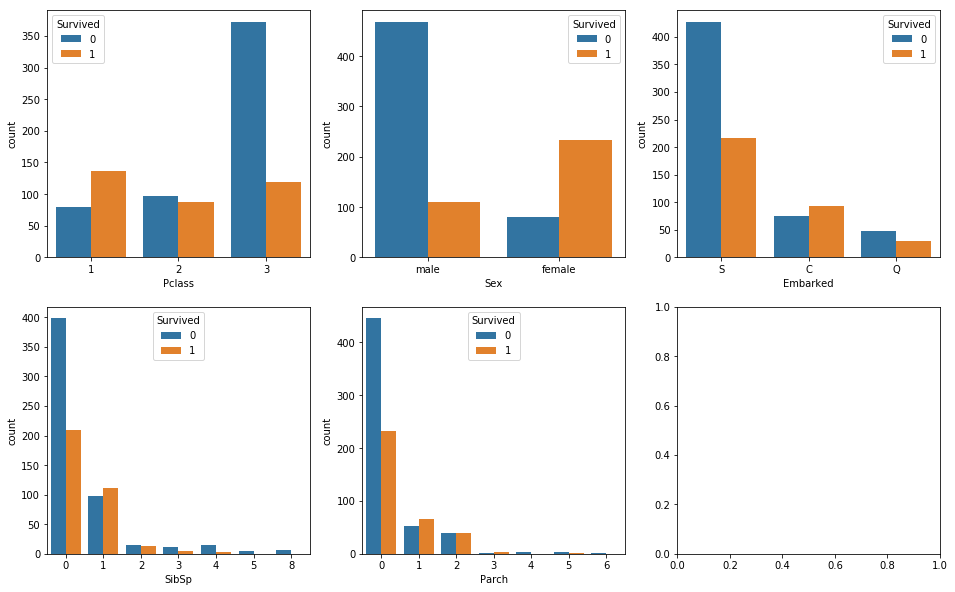

In [6]:
##1 feature engineering
##from the pic shows pclass, sex, embarked,sibsp,parch have the relation with the suivived likehold.
f,ax = plt.subplots(2,3,figsize=(16,10))
sns.countplot('Pclass',hue='Survived',data=data_train,ax=ax[0,0])
sns.countplot('Sex',hue='Survived',data=data_train,ax=ax[0,1])
sns.countplot('Embarked',hue='Survived',data=data_train,ax=ax[0,2])
sns.countplot('SibSp',hue='Survived',data=data_train,ax=ax[1,0])
sns.countplot('Parch',hue='Survived',data=data_train,ax=ax[1,1])

In [7]:
def set_missing_values(data): ##put existing numeric features into the Random Forest Regressor
                              ## and drop the Cabin feature 
    age_df = data[['Age','Fare','Parch','SibSp','Pclass']]
    know_age = age_df[data.Age.notnull()].values
    unknow_age = age_df[data.Age.isnull()].values
    X = know_age[:,1:]
    y = know_age[:,0]
    rfr = RandomForestRegressor(random_state=0,n_estimators=2000,n_jobs=-1)
    rfr.fit(X,y)
    
    PredictAges = rfr.predict(unknow_age[:,1:])
    data.loc[(data.Age.isnull()),'Age'] = PredictAges
    data.drop(['Cabin'], axis=1, inplace = True)
    return data, rfr

In [8]:
data_train, rfr = set_missing_values(data_train)

In [9]:
def attribute_to_number(data):
    dummies_Pclass = pd.get_dummies(data['Pclass'], prefix='Pclass')
    dummies_Sex = pd.get_dummies(data['Sex'], prefix='Sex')
    dummies_Embarked = pd.get_dummies(data['Embarked'], prefix='Embarked')
    data = pd.concat([data,dummies_Pclass,dummies_Sex,dummies_Embarked],axis=1)
    data.drop(['Pclass','Sex','Embarked'], axis=1, inplace=True)
    return data

In [10]:
data_train_number = attribute_to_number(data_train)

In [11]:
def Scales(data): ## Age, Fare have large value change so i will normalize these values to (-1,1)
    scaler = preprocessing.StandardScaler()
    age_scale_param = scaler.fit(data['Age'].values.reshape(-1, 1))
    data['Age_scaled'] = scaler.fit_transform(data['Age'].values.reshape(-1, 1), age_scale_param)
    fare_scale_param = scaler.fit(data['Fare'].values.reshape(-1, 1))
    data['Fare_scaled'] = scaler.fit_transform(data['Fare'].values.reshape(-1, 1), fare_scale_param)   
    data.drop(['Fare', 'Age'], axis=1, inplace=True)
    return data

In [12]:
data_train_number_scales = Scales(data_train_number)

In [13]:
data_train_number_scales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Name           891 non-null object
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Pclass_1       891 non-null uint8
Pclass_2       891 non-null uint8
Pclass_3       891 non-null uint8
Sex_female     891 non-null uint8
Sex_male       891 non-null uint8
Embarked_C     891 non-null uint8
Embarked_Q     891 non-null uint8
Embarked_S     891 non-null uint8
Age_scaled     891 non-null float64
Fare_scaled    891 non-null float64
dtypes: float64(2), int64(4), object(2), uint8(8)
memory usage: 62.7+ KB


In [14]:
data_train_number_scales.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
 ##get X and y
data_copy = data_train_number_scales.copy(deep=True) 
data_copy.drop(
        ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male',
         'Age_scaled', 'Fare_scaled','SibSp','Parch'], axis=1, inplace=True)
y = np.array(data_copy)
data_train_number_scales.drop(['Survived'], axis=1, inplace=True)
X = np.array(data_train_number)

In [15]:
##build LogisticRegression model

In [16]:
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(X, y)
 
clf

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False)

In [17]:
data_test = pd.read_csv('test.csv')

In [18]:
data_test.info()##drop Cabin feature and fill the mission values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [19]:
#data preprocessing 
data_test.loc[data_test.Fare.isnull(), 'Fare'] = 0 ##missing values
set_missing_values(data_test) ##missing values
data_test_number = attribute_to_number(data_test) ##attributes to number
data_test_number_scales = Scales(data_test_number)##scales 
df_test = data_test_number_scales

In [20]:
## prediction 
df_test.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
test = np.array(df_test)
predictions = clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv('logistic_regression_predictions.csv', index=None)